# CART Decision Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Pre-processing

Load and pre-process the dataset:

In [2]:
from lib import pre_processing
file_path = "./data/features_3_sec.csv"
df = pd.read_csv(file_path)
df = pre_processing(df)

## Data Normalization

There is no need to normalize the data with decision trees.

In [3]:
df_numpy = df.to_numpy()
X = df_numpy[:,:-1]
y = df_numpy[:, -1]

In [4]:
X.shape, y.shape

((9990, 57), (9990,))

However, we need a numerical enconding for the labels.

In [5]:
df_numpy = df.to_numpy()
X = df_numpy[:,:-1]
y = df_numpy[:, -1]

In [6]:
from lib import encode_labels
y_ohe = encode_labels(y)

In [7]:
X.shape, y_ohe.shape

((9990, 57), (9990, 10))

## Mutliclass CART DT

In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split

def fit_dtree(X, y, test_size):
    # Train-validation split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    
    # Fit the model
    dtree = tree.DecisionTreeClassifier()
    dtree = dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    
    # Return the accuracy
    return ((y_test == y_pred).sum() / len(y_test))

In [9]:
accuracy_list = []
accuracy = fit_dtree(X, y, 0.33)
accuracy_list.append(accuracy*100)
print(f"| Genre: multiclass | Accuracy: {accuracy:.3%} |")

| Genre: multiclass | Accuracy: 63.876% |


In [10]:
# from sklearn.tree import export_text
# print(export_text(dtree, feature_names=list(df_num.columns)))

## Balanced Binary CART DT

We want classes to have the same number of elements.

Therefore, in this case we will randomly select samples from the other classes.

In [11]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop','jazz', 'metal', 'pop', 'reggae', 'rock']

In [12]:
from lib import balance_classes
for genre in genres:
    Xi, yi = balance_classes(X, y, genre)
    accuracy = fit_dtree(Xi, yi, 0.33)
    accuracy_list.append(accuracy*100)
    print(f"| Genre: {genre:9} | Accuracy: {accuracy:.3%} |")

| Genre: blues     | Accuracy: 82.879% |
| Genre: classical | Accuracy: 94.537% |
| Genre: country   | Accuracy: 80.728% |
| Genre: disco     | Accuracy: 78.636% |
| Genre: hiphop    | Accuracy: 85.736% |
| Genre: jazz      | Accuracy: 86.970% |
| Genre: metal     | Accuracy: 89.394% |
| Genre: pop       | Accuracy: 88.485% |
| Genre: reggae    | Accuracy: 84.848% |
| Genre: rock      | Accuracy: 72.534% |


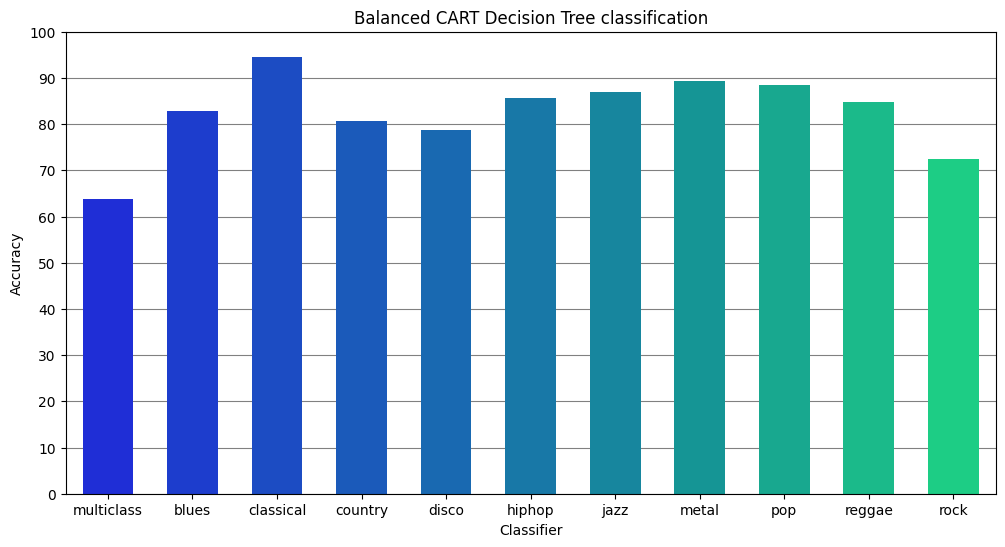

In [13]:
from lib import plot_accuracies
labels = ['multiclass'] + genres
plot_accuracies(labels, accuracy_list, "Balanced CART Decision Tree classification")